In [1]:
from rxnutils import *
from rdkit.Chem import AllChem
import pandas as pd
import os
import ast
from rxnmapper import RXNMapper
from chemUtils.synthesis import reaction
import json
from IPython.display import display
from collections import OrderedDict
from prettytable import PrettyTable
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib_venn import venn3_unweighted

In [19]:
# Load 2 step rxns
os.chdir("/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/D68EV3CPROA/routes_data")
df = pd.read_csv("D68EV3CPROA_enumeration_oct10_first_route_2_step.csv", index_col=0)
len(df)

608

In [20]:
# Get list of all rxns
two_steps = df['rxn_order_first_to_last'].tolist()
two_steps

["['Sp3-sp2 Suzuki coupling', 'Formation of urea from two amines']",
 "['Sp3-sp2 Suzuki coupling', 'Hydroboration of alkene']",
 "['Nucleophilic substitution with amine', 'Ester to alcohol reduction (intermolecular)']",
 "['Amide Schotten-Baumann with amine', 'Carboxylic acid to acid chloride']",
 "['Sp3-sp2 Suzuki coupling', 'Formation of sulfonamide from halide - Shavnya reaction']",
 "['Ester amidation', 'Steglich esterification']",
 "['N-Bn deprotection', 'Sulfonamide Schotten-Baumann with amine (intermolecular)']",
 "['Nucleophilic substitution with amine', 'Ester to alcohol reduction (intermolecular)']",
 "['Sp3-sp2 Suzuki coupling', 'Hydroboration of alkene']",
 "['Buchwald-Hartwig amination', 'Alcohol to triflate']",
 "['Grignard addition to isocyanate (intermolecular)', 'Formation of Grignard']",
 "['Horner-Wadsworth-Emmons reaction', 'Amidation']",
 "['Nucleophilic substitution with thiol', 'Benzylic deprotonation-alkylation (pyridine)']",
 "['Imine reduction to amine', 'Imin

In [21]:
# Convert each string to a list using 'ast.literal_eval'
two_d_list = [ast.literal_eval(item) for item in two_steps]
# Flatten the 2D list to a 1D list
rxns = [item for sublist in two_d_list for item in sublist]
len(rxns)

1216

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90],
 [Text(0, 0, 'Amidation'),
  Text(1, 0, 'Amide Schotten-Baumann with amine'),
  Text(2, 0, 'Sulfonamide Schotten-Baumann with amine (intermolecular)'),
  Text(3, 0, 'Ester amidation'),
  Text(4, 0, 'Sp3-sp2 Suzuki coupling'),
  Text(5, 0, 'Carboxylic acid to acid chloride'),
  Text(6, 0, 'Nucleophilic substitution with amine'),
  Text(7, 0, 'N-Boc deprotection'),
  Text(8, 0, 'Buchwald-Hartwig amidation with amide-like nucleophile'),
  Text(9, 0, 'Steglich es

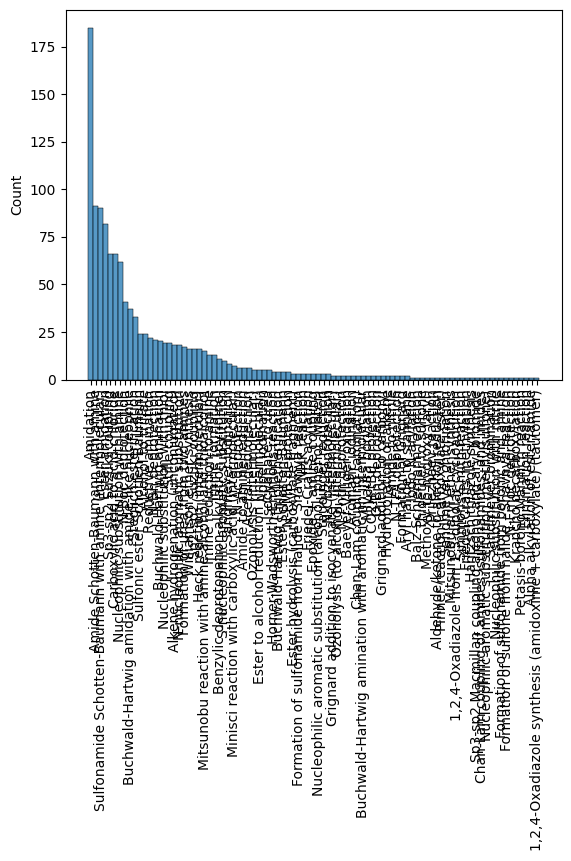

In [34]:
# Show histogram of route counts
# Calculate counts and sort them
sorted_counts = pd.Series(rxns).value_counts().sort_values(ascending=False)

# Create a single list of reactions with the desired order
ordered_rxns = []
for reaction, count in sorted_counts.items():
    ordered_rxns.extend([reaction] * count)

# Plot
sns.histplot(data=ordered_rxns, x=ordered_rxns, discrete=True)

# Set vertical x-tick labels
plt.xticks(rotation=90)

In [35]:
ordered_rxns

['Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amidation',
 'Amid

In [43]:
# Compute the frequency of each string
freqs = Counter(ordered_rxns)

# Set up the table
table = PrettyTable()
table.field_names = ["Name", "Frequency"]

# Populate the table with the computed frequencies
i = 0
for string, freq in freqs.items():
    table.add_row([string, freq])
    i += 1
    if i == 10:
        break

In [44]:
table

Name,Frequency
Amidation,185
Amide Schotten-Baumann with amine,91
Sulfonamide Schotten-Baumann with amine (intermolecular),90
Ester amidation,82
Sp3-sp2 Suzuki coupling,66
Carboxylic acid to acid chloride,66
Nucleophilic substitution with amine,62
N-Boc deprotection,41
Buchwald-Hartwig amidation with amide-like nucleophile,37
Steglich esterification,33


# THREE STEP ROUTES

In [45]:
# Load 3 step rxns
os.chdir("/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/D68EV3CPROA/routes_data")
df = pd.read_csv("D68EV3CPROA_enumeration_oct10_first_route_3_step.csv", index_col=0)
len(df)

481

In [49]:
# Get list of all rxns
three_steps = df['rxn_order_first_to_last'].tolist()
len(set(three_steps))

322

In [51]:
# Convert each string to a list using 'ast.literal_eval'
two_d_list = [ast.literal_eval(item) for item in three_steps]
# Flatten the 2D list to a 1D list
rxns = [item for sublist in two_d_list for item in sublist]
len(set(rxns))

120

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'Amidation'),
  Text(1, 0, 'Ester amidation'),
  Text(2, 0, 'Nucleophilic substitution with amine'),
  Text(3, 0, 'Sp3-sp2 Suzuki coupling'),
  Text(4, 0, 'Sulfonamide Schotten-Baumann with amine (intermolecular)'),
  Text(5, 0, 'Amide Schotten-Baumann with amine'),
  Text(6, 0, 'Williamson ether synthesis'),
  Text(7, 0, 'Carboxylic acid to acid chloride'),
  Text(8, 0, 'N-Bn deprotection'),
  Text(9, 0, 'Alkene hydrogenation (unconjugated)'),
  Text(10, 0, 'Alcohol to triflate'),
  Text(11, 0, 'Buchwald-Hartwig amidation with amide-like nucleophile'),
  Text(12, 0, 'Reductive amination'),
  Text(13, 0, 'Mitsunobu reaction with amine alcohol and thioalcohol'),
  Text(14, 0, 'Formation of urea from two amines'),
  Text(15, 0, 'Staudinger reduction'),
  Text(16, 0, 'N-nucleophilic aromatic substitution'),


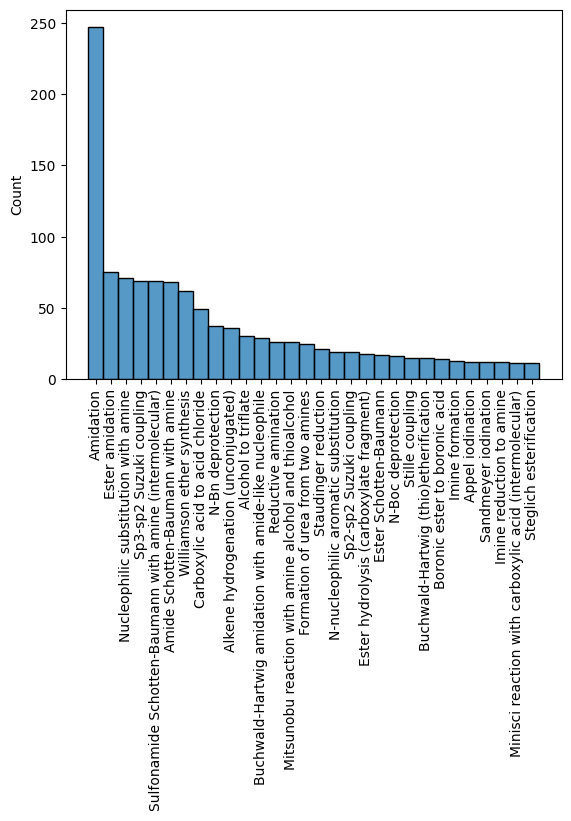

In [53]:
# Show histogram of route counts
# Calculate counts and sort them
sorted_counts = pd.Series(rxns).value_counts().sort_values(ascending=False)

# Create a single list of reactions with the desired order
ordered_rxns = []
for reaction, count in sorted_counts.items():
    ordered_rxns.extend([reaction] * count)

# Plot
sns.histplot(data=ordered_rxns, x=ordered_rxns, discrete=True)

# Set vertical x-tick labels
plt.xticks(rotation=90)

In [54]:
# Compute the frequency of each string
freqs = Counter(ordered_rxns)

# Set up the table
table = PrettyTable()
table.field_names = ["Name", "Frequency"]

# Populate the table with the computed frequencies
i = 0
for string, freq in freqs.items():
    table.add_row([string, freq])
    i += 1
    if i == 10:
        break
table

Name,Frequency
Amidation,247
Ester amidation,75
Nucleophilic substitution with amine,71
Sp3-sp2 Suzuki coupling,69
Sulfonamide Schotten-Baumann with amine (intermolecular),69
Amide Schotten-Baumann with amine,68
Williamson ether synthesis,62
Carboxylic acid to acid chloride,49
N-Bn deprotection,37
Alkene hydrogenation (unconjugated),36


# VENN DIAGRAM

In [5]:
os.chdir('/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/D68EV3CPROA/routes_data')
df1 = pd.read_csv('D68EV3CPROA_enumeration_oct10_first_route_1_step.csv')
df2 = pd.read_csv('D68EV3CPROA_enumeration_oct10_first_route_2_step.csv')
df3 = pd.read_csv('D68EV3CPROA_enumeration_oct10_first_route_3_step.csv')

In [6]:
set1 = set(df1['smiles'])
set2 = set(df2['smiles'])
set3 = set(df3['smiles'])

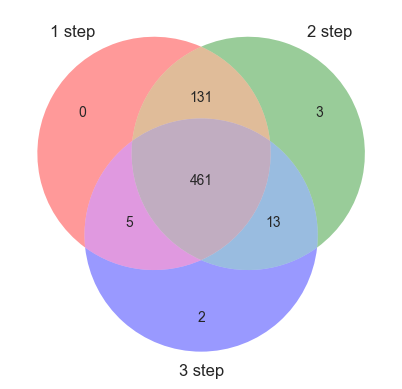

In [7]:
venn3_unweighted([set1, set2, set3], ('1 step', '2 step', '3 step'))

In [8]:
# We aren't getting all products???
os.chdir('/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/D68EV3CPROA/routes_data')
df1_total = pd.read_csv('D68EV3CPROA_enumeration_oct10_routes_1_step.csv')
len(df1_total)

5418

In [9]:
# COMPARE LIST OF SMILES FOR ALL STEPS TO LIST OF ALL COMPOUNDS 
master_list = list(df1['smiles']) + list(df2['smiles']) + list(df3['smiles'])
len(set(master_list))

615

In [10]:
all = pd.read_csv('/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/D68EV3CPROA/base_data/D68EV3CPROA_enumeration_oct10.csv', index_col=0)
all

,smiles,cmpd_id,fragmentA,fragmentB,sucos,int_count
0,Cc1cc2c(cc1NC(=O)NCCc1nnc3ccccn13)OCO2,ENAMINE:Z1637917899,x1140_0A,x1594_0A,0.794439,7
1,Cc1ccc(CCS(=O)(=O)NCc2nnc3ccccn23)cc1,ENAMINE:Z2000385219,x1140_0A,x1594_0A,0.786779,5
2,OC[C@H](c1ccc2c(c1)OCO2)N(CCc1nnc2ccccn12)C[C@...,MOLPORT:009-117-950,x1140_0A,x1594_0A,0.772694,4
3,O=C(CSc1nnc2ccccn12)Nc1ccc2c(c1)OCO2,MOLPORT:000-224-370,x1140_0A,x1594_0A,0.763337,5
4,CCc1nnc2ccc(S(=O)(=O)N(CC)c3ccc4c(c3)OCO4)cn12,MOLPORT:010-916-291,x1594_0A,x1140_0A,0.741537,5
...,...,...,...,...,...,...
717,CC(C)(C)OC(=O)C[C@](C)(C#N)C(=O)NCc1ccsn1,ENAMINE:Z3599345514,x1498_0A,x2021_0A,0.553933,4
718,COC(=O)NCC(=O)N1CCC[C@@H]1CNC(=O)Cc1cnsc1,ENAMINE:PV-002770714191,x1071_0A,x1498_0A,0.553787,2
719,CC(=O)Nc1ccc(-c2noc(CC[C@@H](C)N)n2)cc1,ENAMINE:Z2412805267,x1020_0A,x0130_0A,0.552527,2
720,C[C@@H](NS(C)(=O)=O)C(=O)N1CCC[C@@H](NC(=O)Cc2...,ENAMINE:PV-001765474005,x1071_0A,x2099_0A,0.551061,1


In [14]:
all_set = set(all['smiles'])

In [18]:
def find_duplicates(lst):
    seen = set()
    duplicates = set()

    for item in lst:
        if item in seen:
            duplicates.add(item)
        seen.add(item)

    return list(duplicates)
dup = find_duplicates(all['smiles'])
len(dup)

75